**Лабораторная работа 1**

выполнила: Козлова С.Е. (группа 312)

In [1]:
# импорт всех необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# сохраним названия путей
train_path = '/kaggle/input/mai-ml-lab-1-fiit-2025/train.csv'
test_path = '/kaggle/input/mai-ml-lab-1-fiit-2025/test.csv'

In [3]:
data = pd.read_csv(train_path)
copy_data = data

**Задание 1**

Провести разведочный анализ данных (EDA): построить графики зависимости
некоторых признаков друг от друга, график целевой переменной и матрицу корреляций, сделать выводы.

In [4]:
# удаляем данные с некорректными значениями
data = data.dropna()
data = data[np.abs(data['RiskScore']) <= 100].copy()

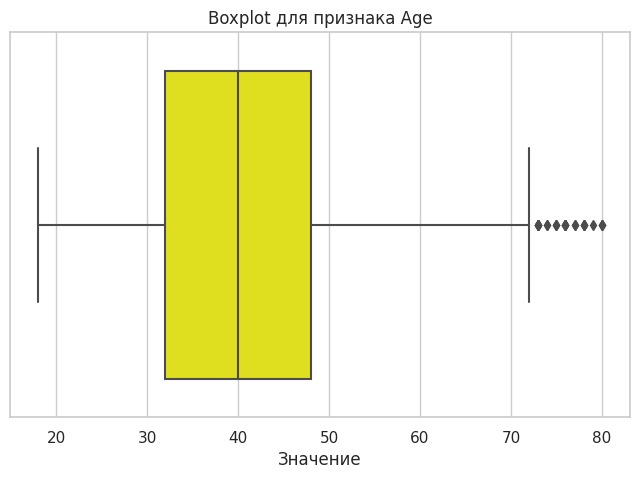

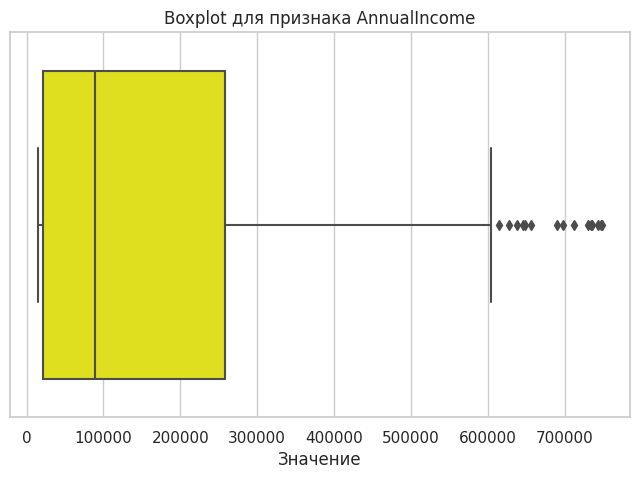

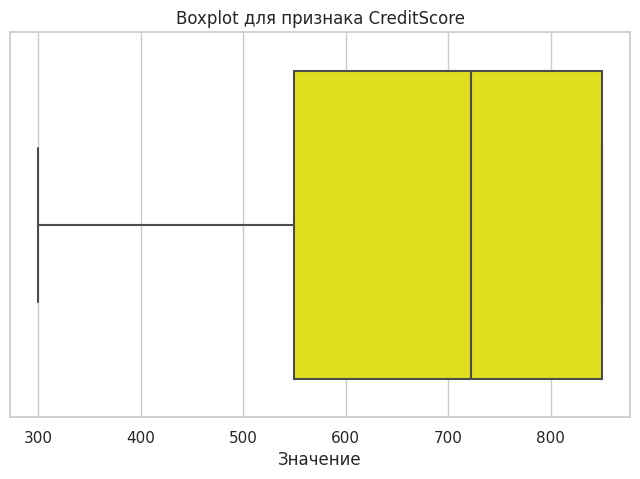

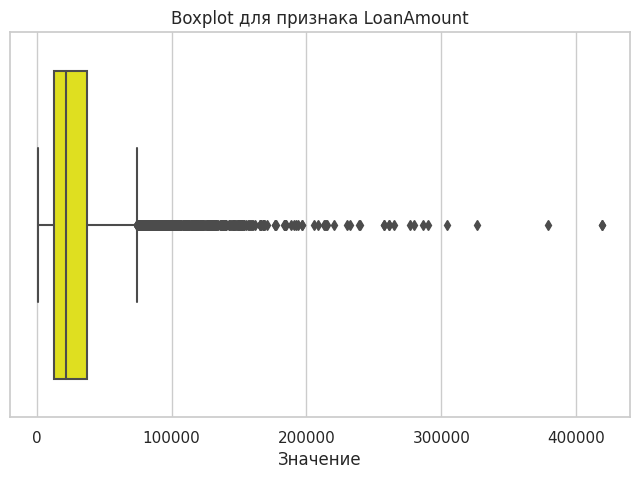

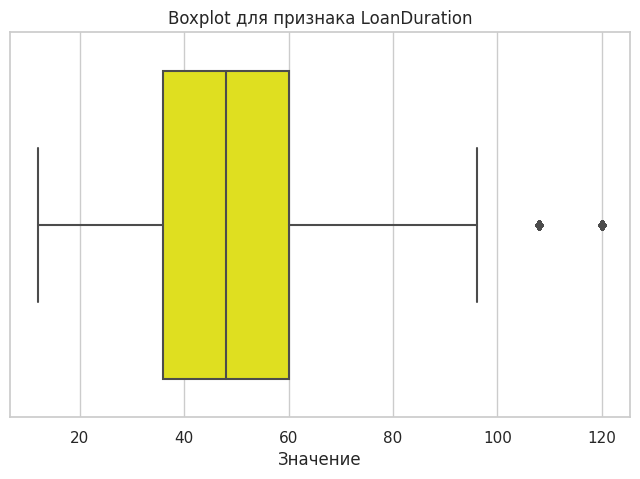

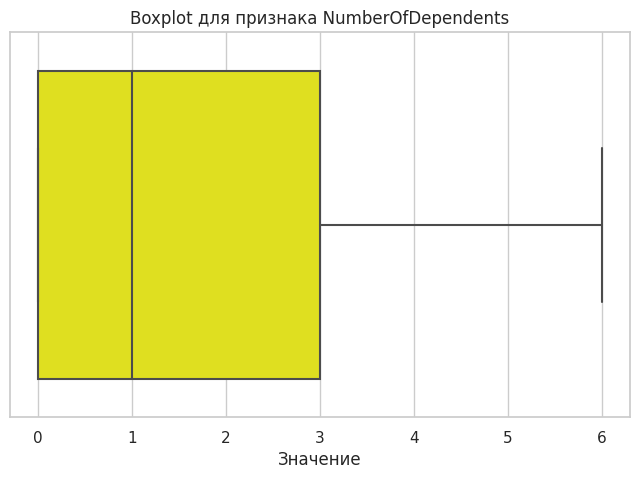

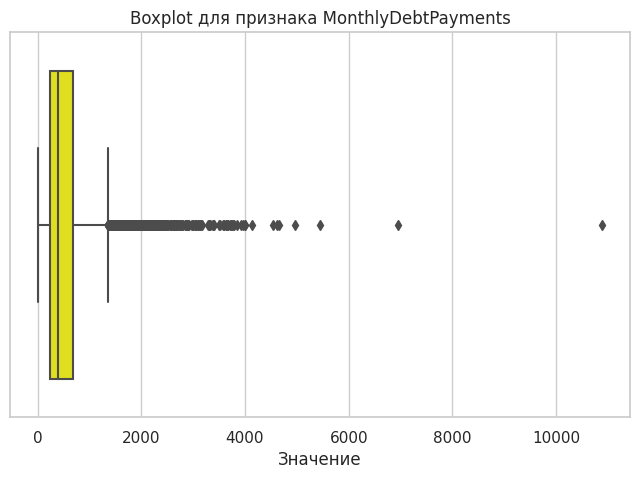

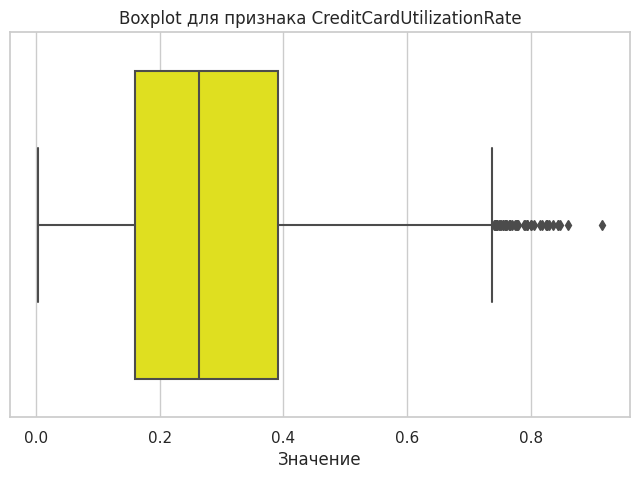

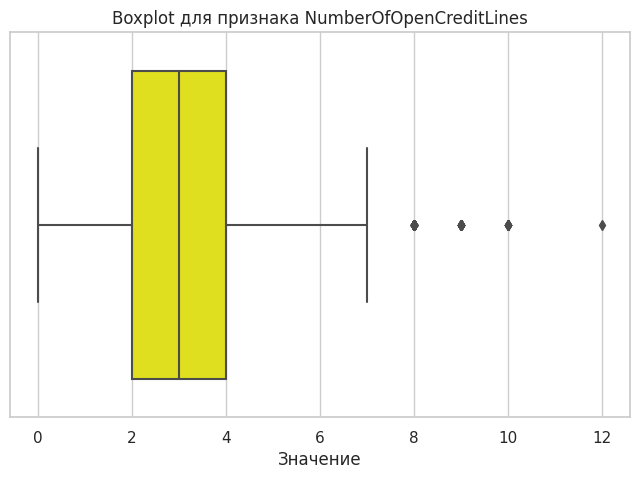

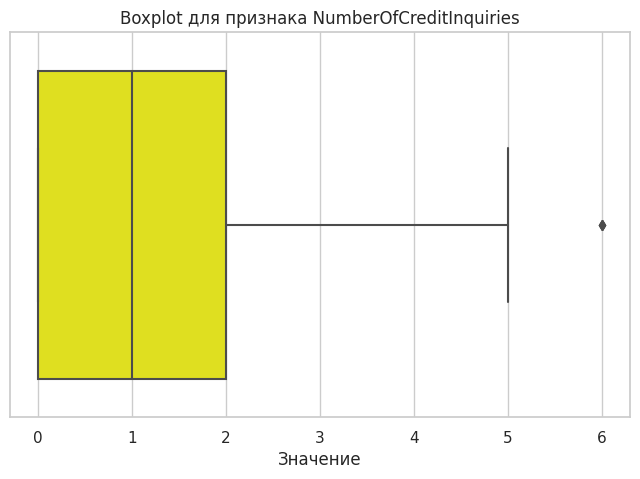

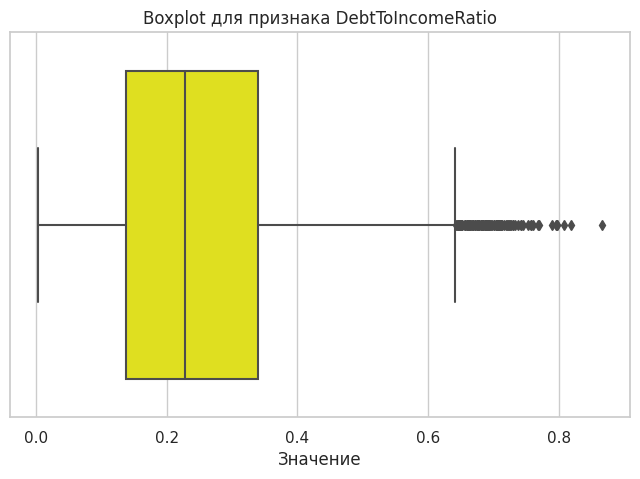

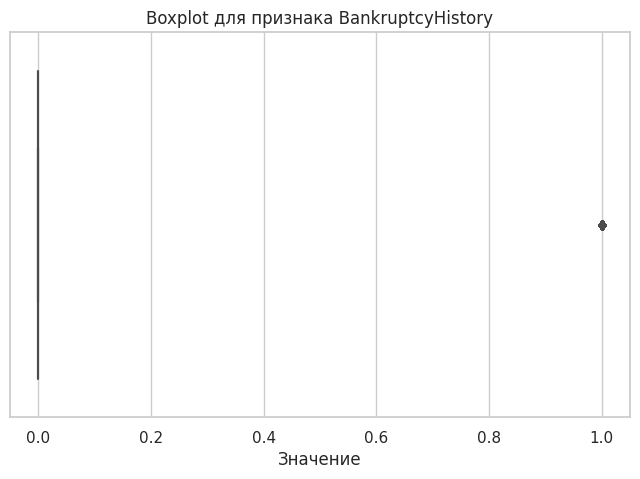

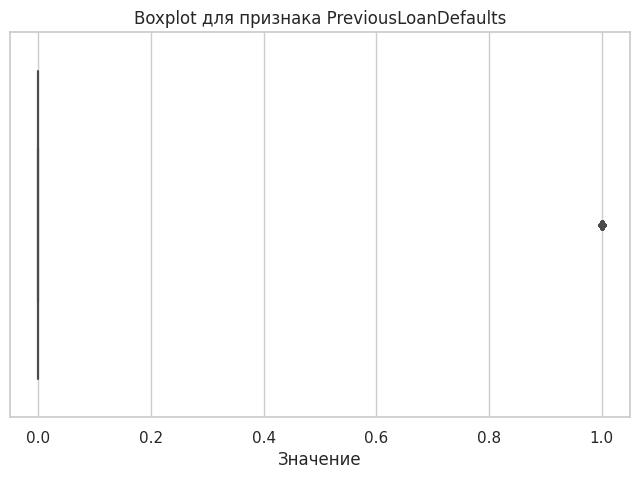

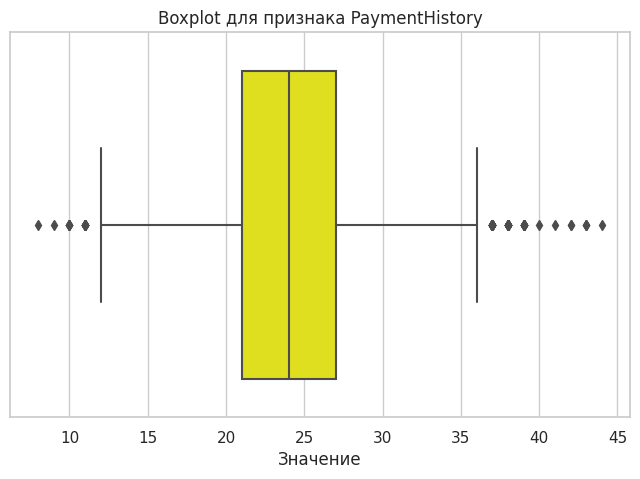

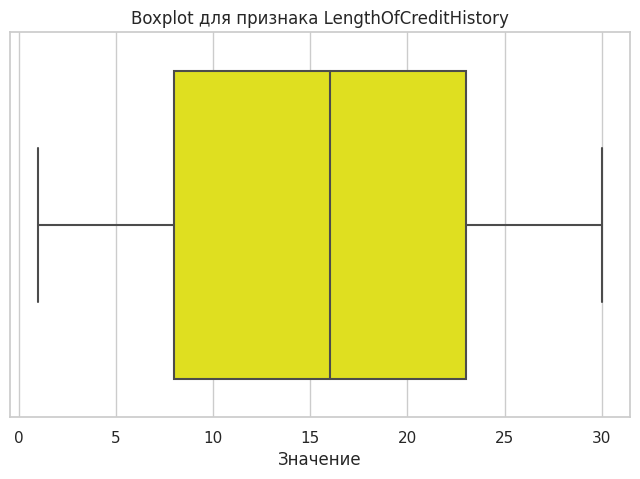

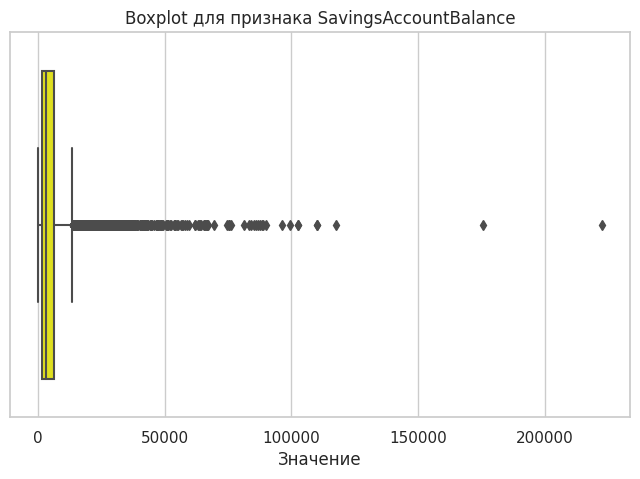

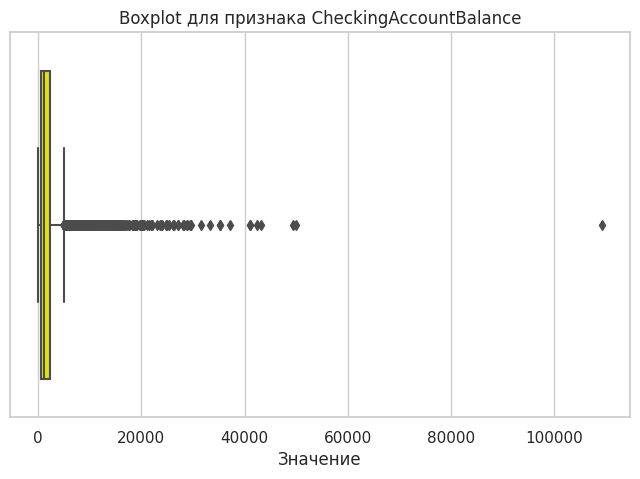

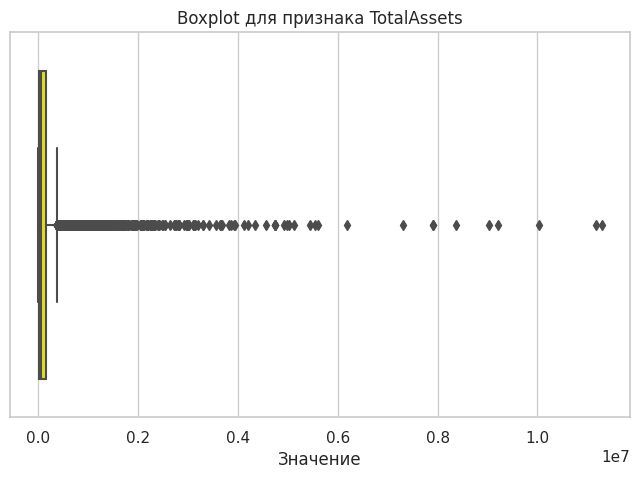

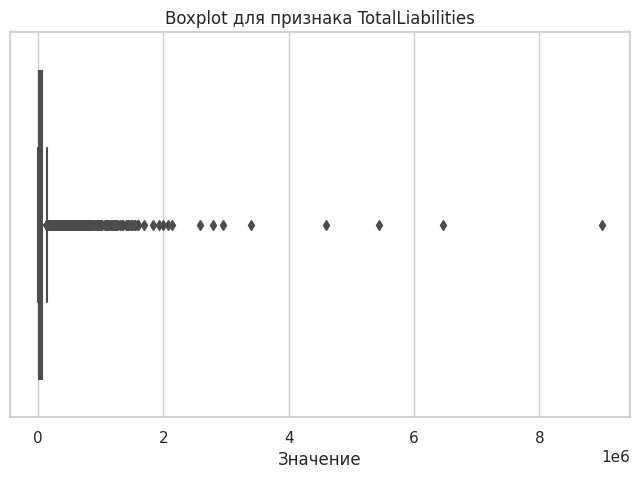

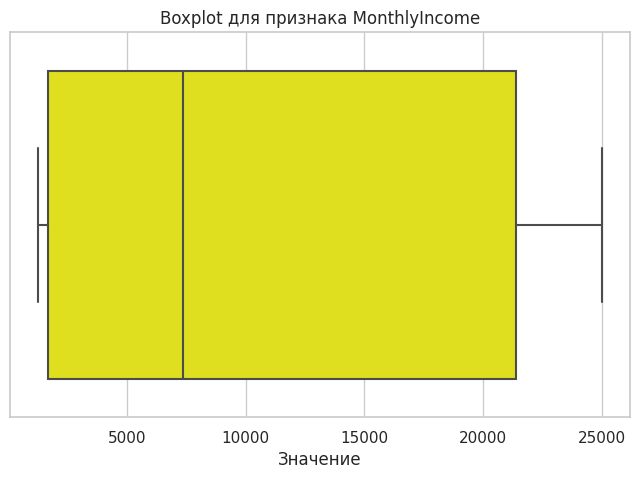

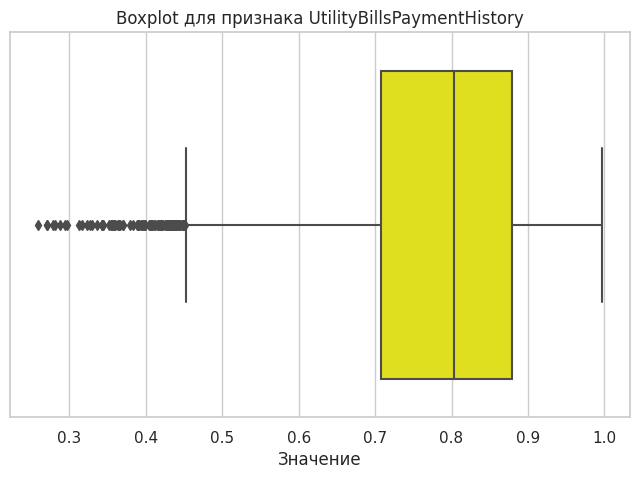

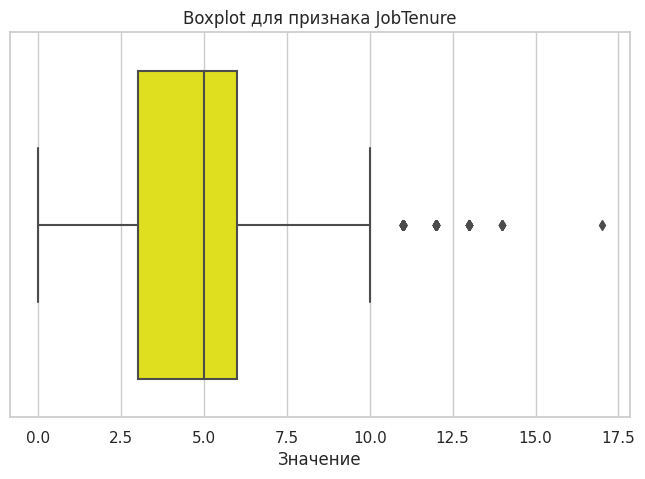

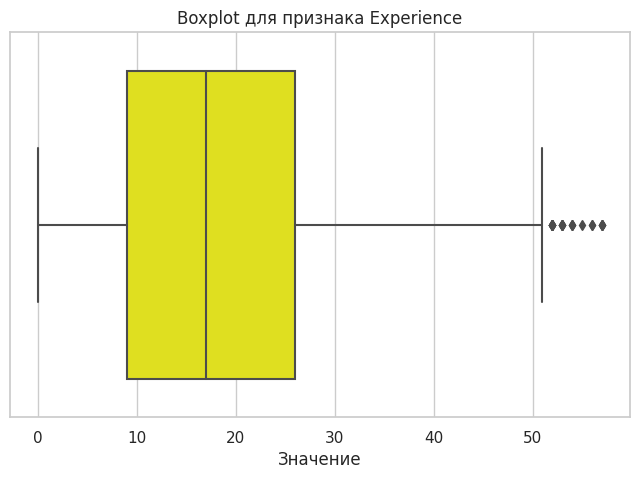

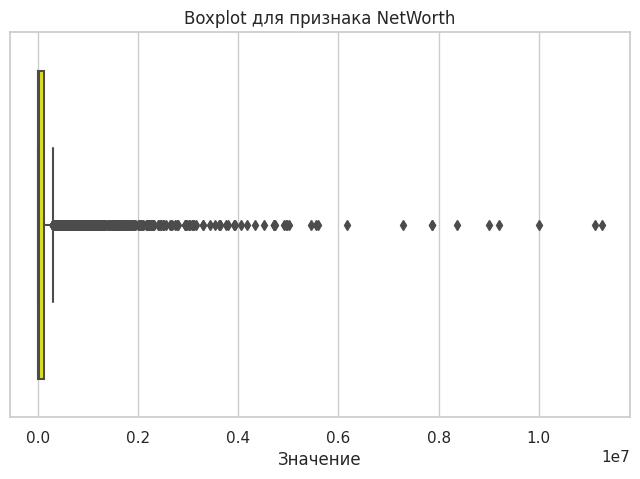

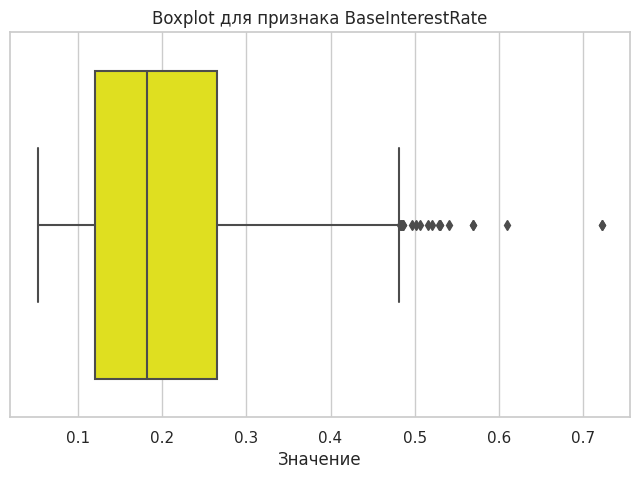

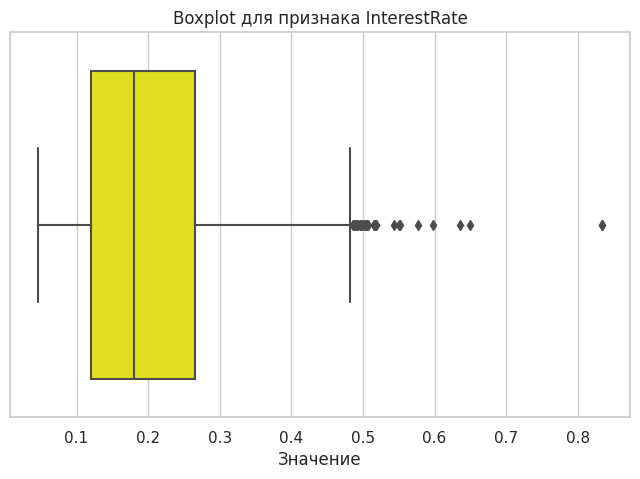

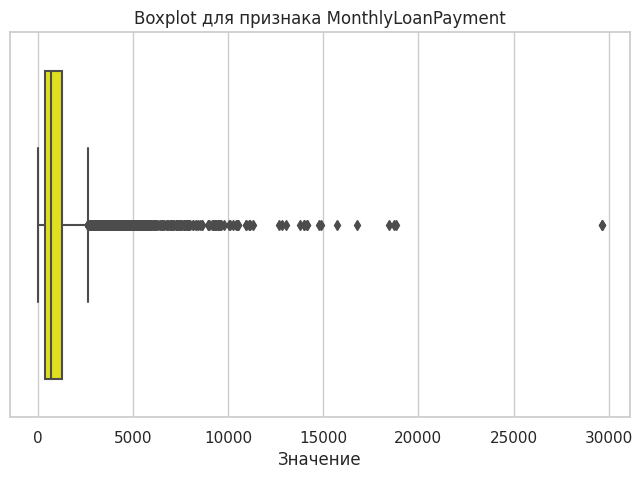

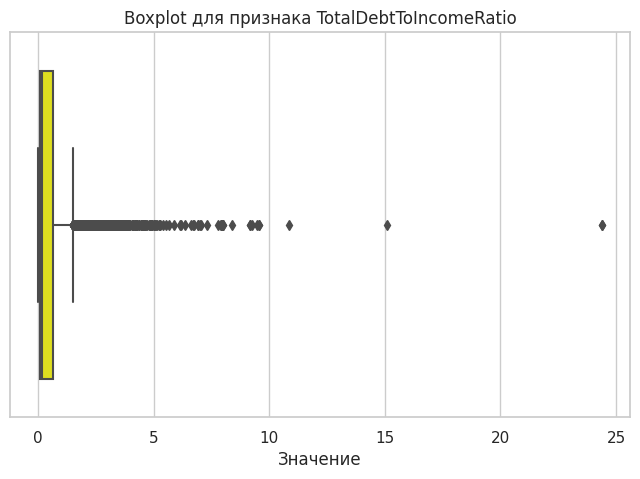

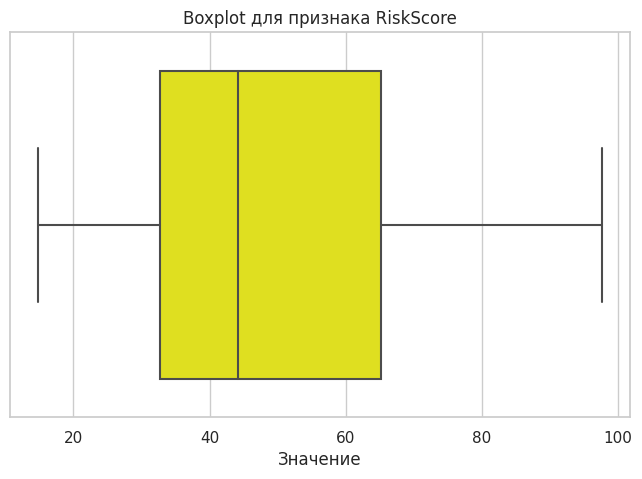

In [5]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
sns.set_theme(style="whitegrid")
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=data, x=col, color='yellow')
    plt.title(f'Boxplot для признака {col}')
    plt.xlabel('Значение')
    plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


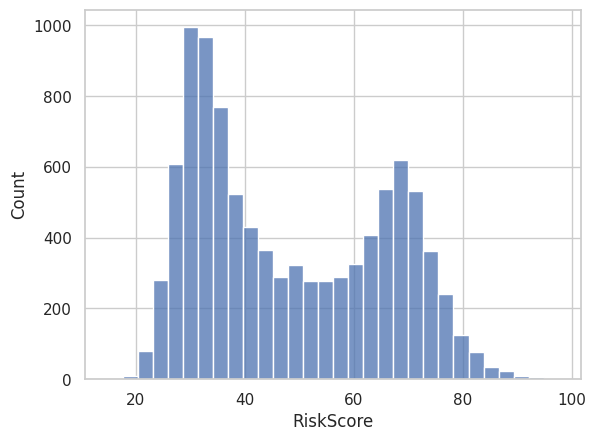

In [6]:
# график целевой переменной
sns.histplot(data['RiskScore'], bins=30)
plt.show()

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


<Axes: >

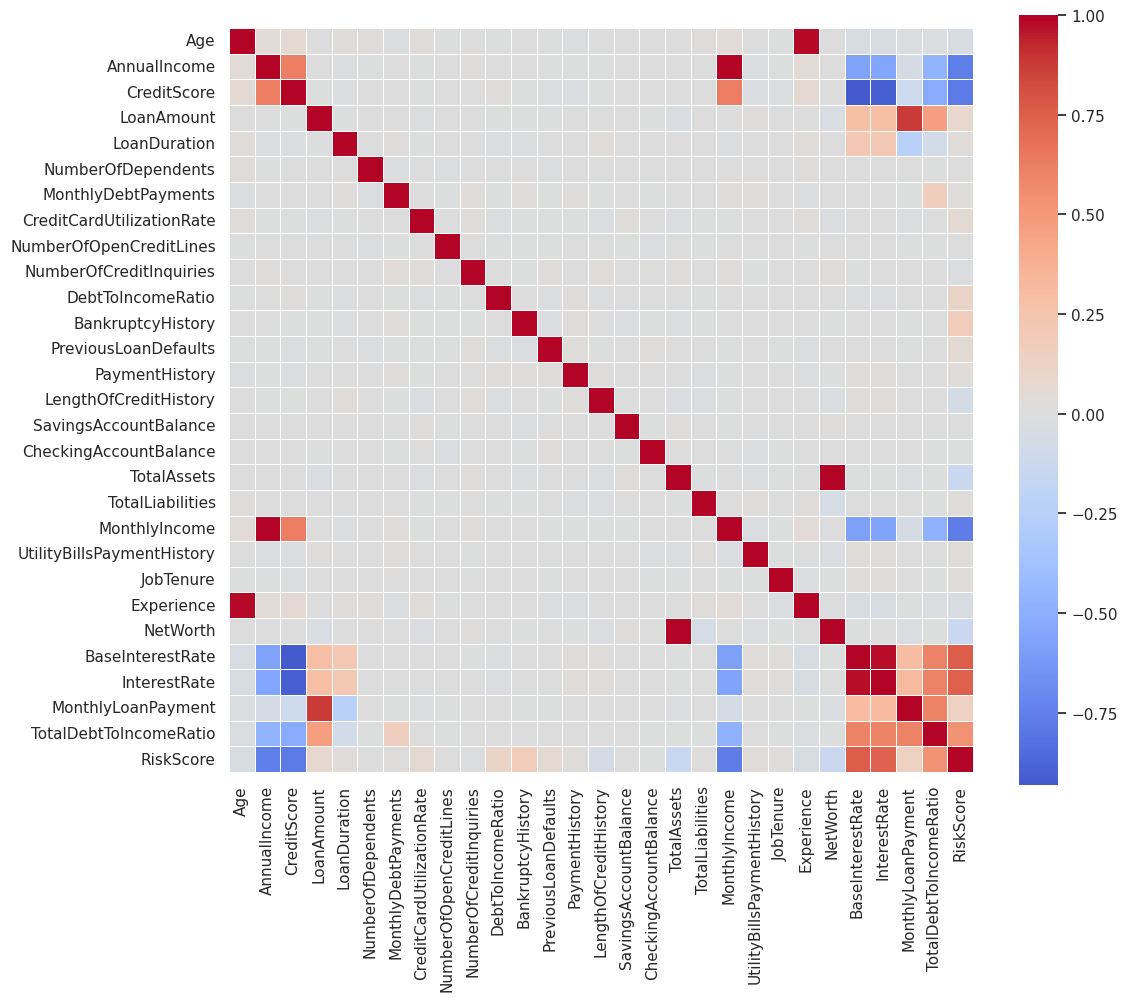

In [7]:
# матрица корреляций
plt.figure(figsize=(12, 10))
corr_matrix = data.corr(numeric_only=True)
sns.heatmap(corr_matrix, center=0, cmap='coolwarm', square=True, linewidths=.5)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

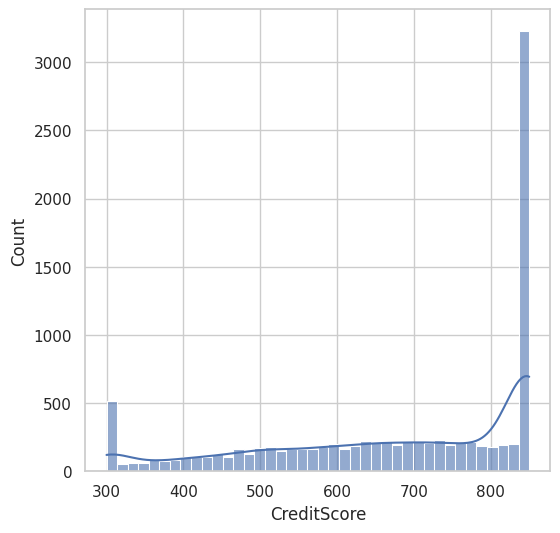

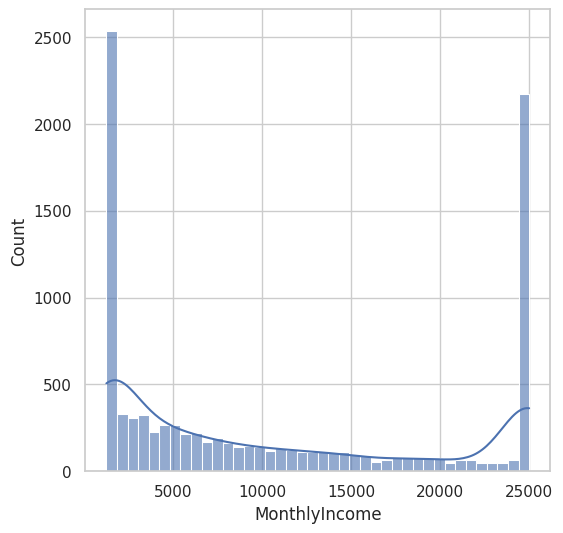

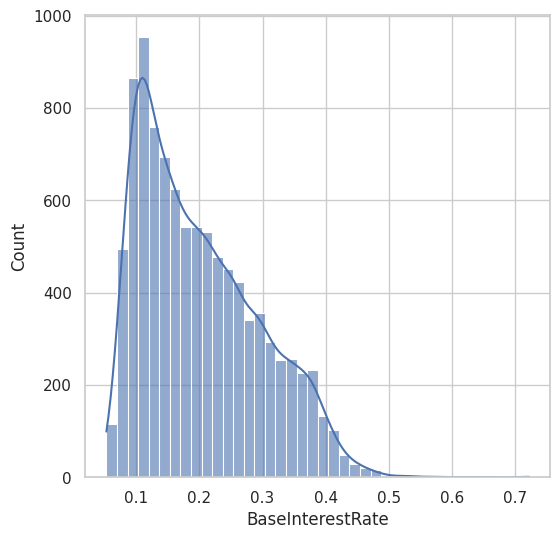

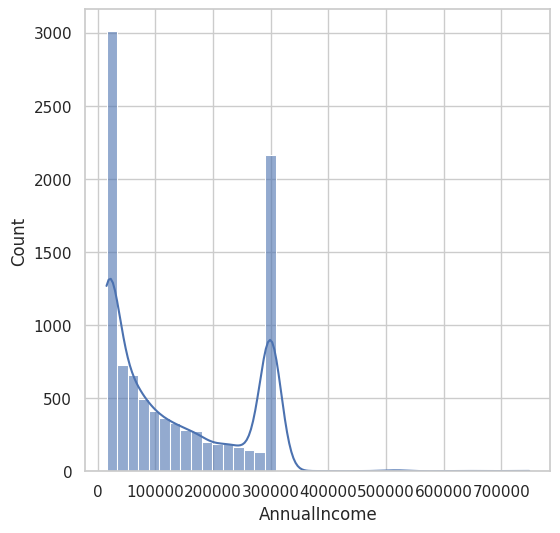

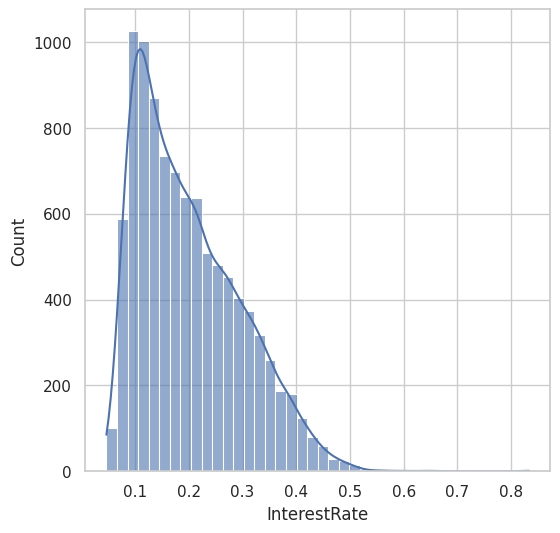

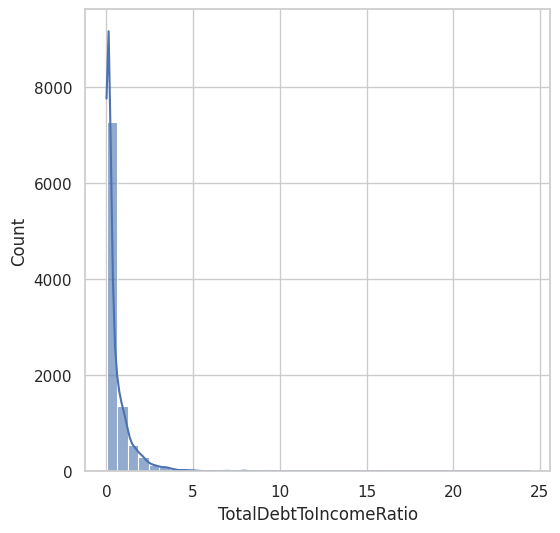

In [8]:
features = ['CreditScore', 'MonthlyIncome', 'BaseInterestRate', 'AnnualIncome', 'InterestRate', 'TotalDebtToIncomeRatio']

for current in features:
    plt.figure(figsize=(6, 6))
    sns.histplot(data[current], bins=40, kde=True, label=current, alpha=0.6)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


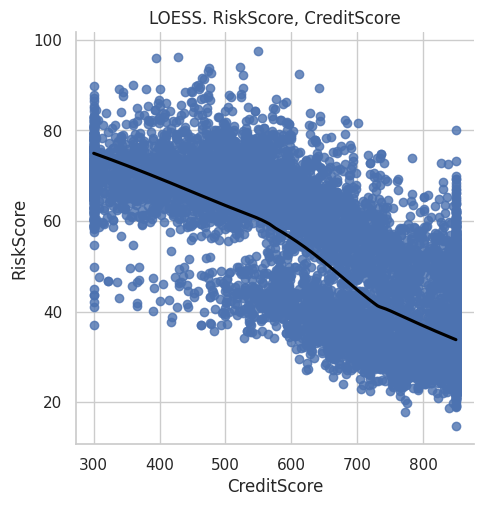

<Figure size 600x400 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


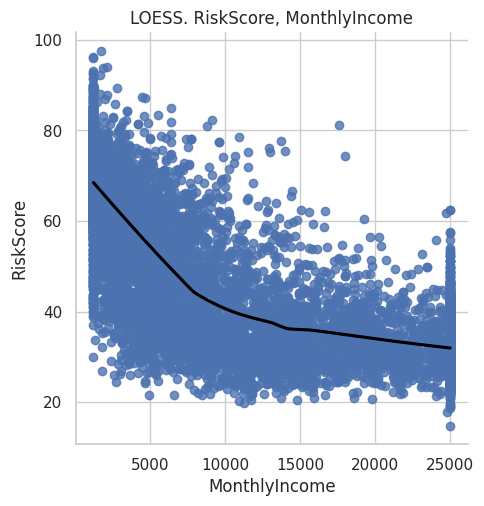

<Figure size 600x400 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


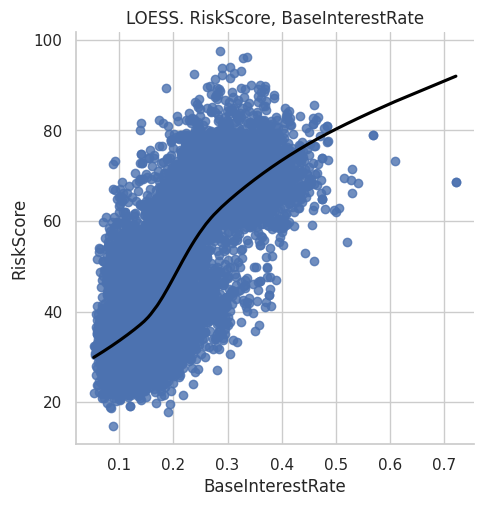

<Figure size 600x400 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


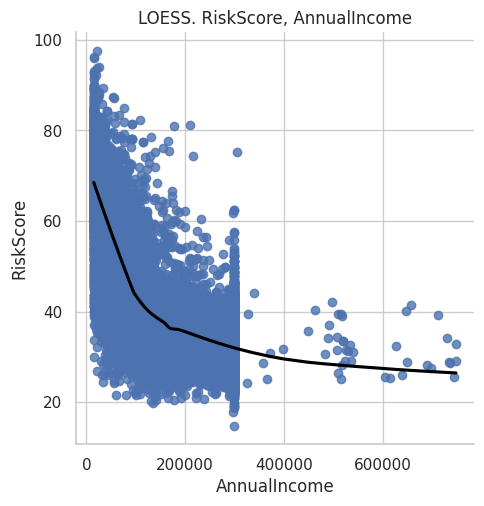

<Figure size 600x400 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


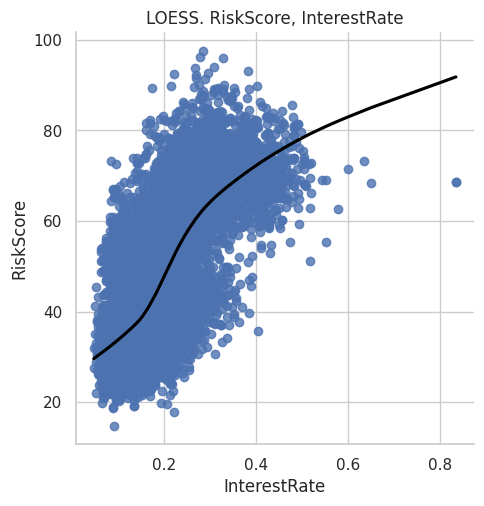

<Figure size 600x400 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


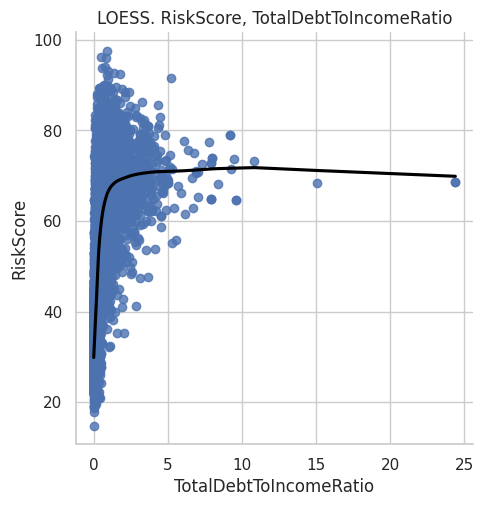

<Figure size 600x400 with 0 Axes>

In [9]:
for current in features:
    sns.lmplot(x=current, y='RiskScore', data=data, lowess=True, line_kws={'color': 'black'})
    plt.title(f"LOESS. RiskScore, {current}")
    plt.figure(figsize=(6, 4))
    plt.tight_layout()
    plt.show()

In [10]:
# выделение нелинейных признаков
def transform_n_log1p(x, n):
    y = x.copy()
    for _ in range(n):
        y = np.log1p(y)
    return y

In [11]:
# добавляем новые признаки
def add_frac_power_feats(df, df1):
    for i in range(2, 3):
        df1[f'UtilityBillsPaymentHistoryPowFeature/{i}'] = df['UtilityBillsPaymentHistory'] ** (1/i)
        df1[f'MonthlyIncomePowFeature/{i}'] = df['MonthlyIncome'] ** (1/i)
        df1[f'CreditScorePowFeature/{i}'] = df['CreditScore'] ** (1/i)
        df1[f'TotalAssetsPowFeature/{i}'] = df['TotalAssets'] ** (1/i)
        df1[f'TotalLiabilitiesPowFeature/{i}'] = df['TotalLiabilities'] ** (1/i)

In [12]:
# добавляем новые признаки
def add_log_feats(df, df1):
    for i in range(1, 2):
        df1[f'MonthlyIncomeLogFeature{i}'] = transform_n_log1p(df['MonthlyIncome'], i)
        df1[f'TotalAssetsLogFeature{i}'] = transform_n_log1p(df['TotalAssets'], i)
        df1[f'LoanAmountLogFeature{i}'] = transform_n_log1p(df['LoanAmount'], i)
        df1[f'UtilityBillsPaymentHistoryLogFeature{i}'] = transform_n_log1p(df['UtilityBillsPaymentHistory'], i)
        df1[f'InterestRateLogFeature{i}'] = transform_n_log1p(df['InterestRate'], i)
        df1[f'DebtToIncomeRatioLogFeature{i}'] = transform_n_log1p(df['DebtToIncomeRatio'], i)

In [13]:
# добавляем новые признаки
def add_bool_feats(df, df1):
    df1['AgeGroup1'] = df['Age'] < 25
    df1['AgeGroup2'] = (df['Age'] < 50) & (df['Age'] >= 25)
    df1['AgeGroup3'] = (df['Age'] < 75) & (df['Age'] >= 50)
    df1['AgeGroup4'] = df['Age'] >= 75
    df1['CreditScoreFeature'] = df['CreditScore'] > 650
    df1['AnnualIncomeFeature'] = df['AnnualIncome'] > 80000
    df1['TotalAssetsFeature'] = df['TotalAssets'] > 3e6
    df1['TotalDebtToIncomeRatioFeature'] = df['TotalDebtToIncomeRatio'] >= 0.3
    df1['UtilityBillsPaymentHistoryFeature'] = df['UtilityBillsPaymentHistory'] <= 0.4
    df1['JobTenureFeature'] = df['JobTenure'] >= 14
    df1['InterestRateFeature'] = df['InterestRate'] <= 0.2
    df1['NumberOfCreditInquiriesFeature'] = df['NumberOfCreditInquiries'] >= 5
    df1['TotalLiabilitiesFeature'] = df['TotalLiabilities'] >= 1e6
    df1['MonthlyIncomeFeature'] = df['MonthlyIncome'] >= 12000

In [14]:
# добавляем новые признаки
def add_comp_feats(df, df1):
    df1['RiskFlagFeature'] = ((df['BankruptcyHistory'] > 0) | (df['PreviousLoanDefaults'] > 0)).astype(int)
    df1['StabilityScoreFeature'] = df['PaymentHistory'] * np.log1p(df['LengthOfCreditHistory'])
    df1['FinancialSafetyNetFeature'] = (df['SavingsAccountBalance'] + df['TotalAssets']) / (df['MonthlyDebtPayments'] + 1e-6)

In [15]:
# добавляем новые признаки
def add_ratio_feats(df, df1):
    df1['MonthlyIncomePerPersonFeature'] = df['MonthlyIncome'] / (df['NumberOfDependents'] + 1)
    df1['TotalAssetsToMonthlyIncomeFeature'] = df['TotalAssets'] / (df['MonthlyIncome'] + 1e-6)
    df1['MonthlyIncomeToLoanRatioFeature'] = df['MonthlyIncome'] / (df['LoanAmount'] + 1e-6)
    df1['CreditLinesPerInquiryFeature'] = df['NumberOfOpenCreditLines'] / (df['NumberOfCreditInquiries'] + 1e-6)
    df1['NetWorthToMonthlyIncomeFeature'] = df['NetWorth'] / (df['MonthlyIncome'] + 1e-6)
    df1['SavingBalanceToCheckingBalanceFeature'] = df['SavingsAccountBalance'] / (df['CheckingAccountBalance'] + 1e-6)

In [16]:
# добавляем полиномиальные признаки
def get_poly_feats(df, poly_feats, deg):
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    poly_vals = poly.fit_transform(df[poly_feats])
    poly_cols = poly.get_feature_names_out()
    return pd.DataFrame(poly_vals, columns=poly_cols, index=df.index)

In [17]:
# применяем все изменения к датасету
def transform_my_data(data, feats_poly):
    df1 = data.copy()
    drop_cols = ['MonthlyIncome', 'NetWorth', 'BaseInterestRate', 'InterestRate', 'Experience', 'ApplicationDate']
    df1 = df1.drop(drop_cols, axis=1)

    add_bool_feats(data, df1)
    add_frac_power_feats(data, df1)
    add_log_feats(data, df1)
    add_ratio_feats(data, df1)
    add_comp_feats(data, df1)

    if 'RiskScore' in data.columns:
        corrs = df1.corrwith(data['RiskScore'], numeric_only=True).abs().sort_values(ascending=False)
        feats_poly = corrs.index.tolist()
        feats_poly.remove('RiskScore')

    poly_df1 = get_poly_feats(df1, feats_poly[:35], 2)
    df1 = pd.concat([df1, poly_df1], axis=1)

    poly_df2 = get_poly_feats(df1, feats_poly[:10], 3)
    df1 = pd.concat([df1, poly_df2], axis=1)

    df1 = df1.loc[:, ~df1.columns.duplicated()]
    return df1, feats_poly

In [18]:
# выбираем признаки с наибольшей или наименьшей корреляцией
def select_features_for_learn(X, y, value=0.1):
    
    correlations = X.corrwith(y).abs().sort_values(ascending=False)
    
    selected = correlations[correlations > value].index.to_list()
    selected.remove(y.name)
    
    return X[selected], selected

**Задание 5**

Реализовать метрику MSE, протестировать и сравнить полученный результат
с MSE из sklearn.

In [19]:
from sklearn.metrics import mean_squared_error

def my_mse(true, prediction):
    return np.mean((true - prediction) ** 2)

true_values_testing = np.array([0.1, 0.3, 0.5, 0.4, 0.5, 0.2, 0.7])
prediction_values_testing = np.array([0.1, 0.2, 0.4, 0.5, 0.2, 0.5, 0.9])
print(f'my mse realization:      {my_mse(true_values_testing, prediction_values_testing)}')
print(f'sklearn mse realization: {mean_squared_error(true_values_testing, prediction_values_testing)}')

my mse realization:      0.03571428571428571
sklearn mse realization: 0.03571428571428571


**Задание 6**

Реализовать MAE, протестировать и сравнить с метрикой из sklearn.

In [20]:
from sklearn.metrics import mean_absolute_error

def my_mae(true, prediction):
    return np.mean(np.abs(true - prediction))

print(f'my mae realization:      {my_mae(true_values_testing, prediction_values_testing)}')
print(f'sklearn mae realization: {mean_absolute_error(true_values_testing, prediction_values_testing)}')

my mae realization:      0.15714285714285717
sklearn mae realization: 0.15714285714285717


**Задание 7**

Реализовать R2, протестировать и сравнить с метрикой из sklearn.

In [21]:
from sklearn.metrics import r2_score

def my_R2(true, prediction):
    numerator = np.sum((true - prediction) ** 2)
    denominator = np.sum((true - np.mean(true)) ** 2)
    return 1 - numerator / denominator

print(f'my r2-score realization:      {my_R2(true_values_testing, prediction_values_testing)}')
print(f'sklearn r2-score realization: {r2_score(true_values_testing, prediction_values_testing)}')

my r2-score realization:      -0.00574712643678188
sklearn r2-score realization: -0.00574712643678188


**Задание 8**

Реализовать MAPE, протестировать и сравнить с метрикой из sklearn.

In [22]:
from sklearn.metrics import mean_absolute_percentage_error

def my_mape(true, prediction):
    return np.mean(np.abs((true - prediction) / true))

print(f'my mape realization:      {my_mape(true_values_testing, prediction_values_testing)}')
print(f'sklearn mape realization: {mean_absolute_percentage_error(true_values_testing, prediction_values_testing)}')

my mape realization:      0.45272108843537406
sklearn mape realization: 0.45272108843537406


In [23]:
class RidgeRegression:
    def __init__(self, alpha=0.01):
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = 0

    def fit(self, X, Y):
        X_aug = np.c_[np.ones(X.shape[0]), X]
        I = np.eye(X_aug.shape[1])
        I[0, 0] = 0
        
        W = np.linalg.inv(X_aug.T @ X_aug + self.alpha * I) @ X_aug.T @ Y
        self.coef_ = W[1:]
        self.intercept_ = W[0]

    def predict(self, X):
        return X @ self.coef_ + self.intercept_

**Задание 2**

Реализовать нормализацию данных с помощью z-score и min-max.

In [24]:
# класс, осуществляющий min-max нормализацию данных
class MinMaxNormalizer:
    def __init__(self):
        self.params = []
        
    def fit(self, data):
        for col_idx in range(data.shape[1]):
            min_value = np.nanmin(data[:, col_idx])
            max_value = np.nanmax(data[:, col_idx])
            self.params.append((min_value, max_value))

    def transform(self, data):
        normalized_data = data.copy()
        for col_idx, (min_value, max_value) in enumerate(self.params):
            normalized_data[:, col_idx] = (normalized_data[:, col_idx] - min_value) / (max_value - min_value)
        return normalized_data


In [25]:
# класс, осуществляющий z-score нормализацию данных
class ZScoreNormalizer:
    def __init__(self):
        self.params = []

    def fit(self, data):
        for col_idx in range(data.shape[1]):
            mean_value = np.nanmean(data[:, col_idx])
            std_value = np.nanstd(data[:, col_idx])
            self.params.append((mean_value, std_value))

    def transform(self, data):
        normalized_data = data.copy()
        for col_idx, (mean_value, std_value) in enumerate(self.params):
            normalized_data[:, col_idx] = (normalized_data[:, col_idx] - mean_value) / std_value
        return normalized_data

In [26]:
def encode_features(data):
    encode_data = data.copy()
    
    cols = encode_data.select_dtypes(include=['object', 'category']).columns.to_list()
    encode_data = pd.get_dummies(encode_data, columns=cols, prefix=cols)
    
    return encode_data

In [27]:
y = data['RiskScore']

data, features_for_pol = transform_my_data(data, [])

data = encode_features(data)

data = data.astype(np.float64)

data, selected_features = select_features_for_learn(data, data['RiskScore'], 0.0001)

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [28]:
data_X = data.to_numpy()
data_Y = y.to_numpy()

normalizer = MinMaxNormalizer()
normalizer = ZScoreNormalizer()
normalizer.fit(data_X)

data_X = normalizer.transform(data_X)

In [29]:
my_model = RidgeRegression(180)
my_model.fit(data_X, data_Y)

In [30]:
test_df = pd.read_csv(test_path)

test_df = test_df.drop('ID', axis=1)

test_df, _ = transform_my_data(test_df, features_for_pol)

test_df = encode_features(test_df)
test_df = test_df[selected_features]

test_X = test_df.to_numpy()

test_X = normalizer.transform(test_X)

In [31]:
prediction = list()
test_result = {"ID": [], "RiskScore": []}

In [32]:
for i in range(len(test_X)):
    
    current = my_model.predict(test_X[i])
    prediction.append(current)

    test_result["ID"].append(i)
    test_result["RiskScore"].append(current)


test_df = pd.DataFrame(test_result)
test_df.to_csv('submission.csv', index=False)

**Задание 4**

Реализовать кросс-валидацию k-fold и leave-one-out.

In [33]:
def k_fold(X, n_folds: int = 2):
    fold_size = len(X) // n_folds
    remainder = len(X) % n_folds
    
    folds = []
    start_idx = 0
    all_indices = list(range(len(X)))
    
    for fold_num in range(n_folds):
        current_fold_size = fold_size
        if fold_num < remainder:
            current_fold_size += 1
        
        test_indices = all_indices[start_idx:start_idx + current_fold_size]
        train_indices = [idx for idx in all_indices if idx not in test_indices]
        
        folds.append([np.array(train_indices), np.array(test_indices)])
        start_idx += current_fold_size
    
    return folds

In [34]:
def leave_one_out(X):
    return k_fold(X, len(X))

**Задание 3**

Реализовать класс линейной регрессии с обязательными методами fit и predict,
метод fit реализовать через аналитическую формулу, через градиентный спуск
и стохастический градиентный спуск. Сравнить полученные результаты с реализациями sklearn.

In [35]:
class MyLinearRegression:
    def __init__(self, method='analytical', learning_rate=0.01, iter=1e4) :
        self.method = method
        self.learning_rate = learning_rate
        self.iter = int(iter)
        self.weights = None

    def add_bias(self, X):
        return np.c_[np.ones(X.shape[0]), X]

    def fit(self, X, y):
        X = self.add_bias(X)
        m = X.shape[0]
        n = X.shape[1] 
        
        if self.method == 'analytical':
            self.weights = np.linalg.pinv(X.T @ X) @ X.T @ y
            
        elif self.method == 'gradient': 
            
            self.weights = np.zeros(n)

            for i in range(self.iter):
                gradient = (1 / m) * (X.T @ (X @ self.weights - y)) 
                self.weights -= self.learning_rate * gradient  
       
        elif self.method == 'sgradient':
            
            self.weights = np.zeros(n)
            
            for epoch in range(self.iter):
                indices = np.arange(m)
                np.random.shuffle(indices)
                for i in indices:
                    x_i = X[i:i+1]  
                    y_i = y[i]      
                    gradient = x_i.T * (x_i @ self.weights - y_i)
                    self.weights -= self.learning_rate * gradient.flatten() 
        else:
            raise ValueError('Некорректный метод, поддерживаются только методы: analytical, gradient, sgradient')


    def predict(self, X):
        X = self.add_bias(X)
        return X @ self.weights
            

In [36]:
from sklearn.linear_model import LinearRegression

best_mse = float('inf')

folds = k_fold(data_X, 5)
for i, (train, test)  in enumerate(folds):
    prediction = list()
    new_model = RidgeRegression(180)
    new_model.fit(data_X[train], data_Y[train])
    for i in data_X[test]:
        prediction.append(new_model.predict(i))
    best_mse = min(best_mse, my_mse(data_Y[test], prediction))
print(f'Наилучшее достигнутое mse при k-fold: {best_mse}')

Наилучшее достигнутое mse при k-fold: 22.81429892678094


In [37]:
from sklearn.linear_model import LinearRegression

print('Сравнение Ridge-регрессии и линейной регрессии')
print('Значения коэффициентов при Ridge-регрессии:')
my_ridge_model = RidgeRegression(180)
my_ridge_model.fit(data_X, data_Y)
print(my_ridge_model.coef_)
print()
print('Значения коэффициентов при обычной линейной регрессии:')
classic_model = LinearRegression()
classic_model.fit(data_X, data_Y)
print(classic_model.coef_)

Сравнение Ridge-регрессии и линейной регрессии
Значения коэффициентов при Ridge-регрессии:
[-0.33133221 -0.33133221 -0.41144581 ...  0.05157314  0.07258578
 -0.08930353]

Значения коэффициентов при обычной линейной регрессии:
[-2.09980014e+10  2.09986177e+10 -2.57208537e+11 ...  2.57832175e+11
  3.52797508e-02 -8.93211365e-02]


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    data_X, data_Y, test_size=0.2, random_state=42
)

model1 = MyLinearRegression(method="analytical")
model1.fit(X_train, y_train)

train_pred1 = model1.predict(X_train)
val_pred1 = model1.predict(X_val)

mse_train1 = my_mse(y_train, train_pred1)
mse_val1 = my_mse(y_val, val_pred1)

print('Analytical linear regression:')
print(f'Train MSE: {mse_train1:.6f}')
print(f'Val MSE:   {mse_val1:.6f}')
print()

model_sklearn = LinearRegression()
model_sklearn.fit(X_train, y_train)

train_pred_sklearn = model_sklearn.predict(X_train)
val_pred_sklearn = model_sklearn.predict(X_val)

mse_train_sklearn = my_mse(y_train, train_pred_sklearn)
mse_val_sklearn = my_mse(y_val, val_pred_sklearn)

print('Sklearn LinearRegression:')
print(f'Train MSE: {mse_train_sklearn:.6f}')
print(f'Val MSE:   {mse_val_sklearn:.6f}')

Analytical linear regression:
Train MSE: 18.063413
Val MSE:   1545201.158561

Sklearn LinearRegression:
Train MSE: 17.991077
Val MSE:   628716437837328519528448.000000


Глядя на эти значения, можно понять, зачем нужна Ridge-регрессия: иначе получаем очень большие значения MSE на валидационной выборке, и малые (хорошие) на тренировочной.